## Data Wrangling : WeRateDogs


## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering data](#gather)
- [Part II - Assessing data](#assess)
- [Part III - Cleaning date](#clean)
- [Part IV - Storing, Analyzing, and Visualizing Data](#analysis)
- [Part V - Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.


Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.


The Data
1. The WeRateDogs Twitter archive which provided by Udacity. Download this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
<a id='gather'></a>
#### Part I - Gathering data


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
import os
import csv
%matplotlib inline

In [4]:
#load archive csv file in dataframe
df_arch = pd.read_csv("twitter-archive-enhanced.csv")
df_arch.head()
df_arch.shape

(2356, 17)

In [5]:
#download tweet image predictions by using url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
#save the file
with open('image-predictions.tsv',mode='wb') as file:
    file.write(r.content)

In [6]:
#read tsv file to dataframe
df_img = pd.read_csv('image-predictions.tsv', sep = '\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#add our own authentication information

consumer_key = 'no show'
consumer_secret = 'no show'
access_token = 'no show'
access_token_secret = 'no show'
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True) 

In [115]:
#keep tracking error ids
tweet_errors = []
# save api data to json text file
with open('tweet_json.txt', 'w') as file:
    for tweet_id in df_arch['tweet_id']:
        try:
            tweetfetched = api.get_status(tweet_id, tweet_mode='extended')
            file.write(json.dumps(tweetfetched._json) + '\n')
        # create a list for the ones can not be downloaded automatically
        except Exception as e:
                    print(str(tweet_id)+ " " + str(e))
                    tweet_errors.append(tweet_id)



888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 [{'code': 144, 'message': 'No sta

Rate limit reached. Sleeping for: 178


779123168116150273 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]
771004394259247104 [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
770743923962707968 [{'code': 144, 'message': 'No status found with that ID.'}]
759566828574212096 [{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368 [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 630


680055455951884288 [{'code': 144, 'message': 'No status found with that ID.'}]


In [1351]:
# check length of successful results
print(len(tweet_list))
# check length of error results
print(len(tweet_errors))


2331
25


In [7]:
# List of dictionaries to build and convert to a DataFrame later
tweet_list = []
with open("tweet_json.txt") as f: 
    json_df = pd.DataFrame()
    for line in f:
        tweet_list.append(json.loads(line))
tweet_data=[]       
for data in tweet_list:
        tweet_data.append({'tweet_id' : data['id'],
                       'retweet_counts': int(data['retweet_count']),
                       'favorite_counts' : int(data['favorite_count'])})
json_df = json_df.append(pd.DataFrame(tweet_data, columns=['tweet_id','favorite_counts','retweet_counts']))
        
    
json_df = json_df.reset_index(drop = True)
json_df


,tweet_id,favorite_counts,retweet_counts
0,892420643555336193,35885,7603
1,892177421306343426,30941,5630
2,891815181378084864,23291,3725
3,891689557279858688,39131,7772
4,891327558926688256,37376,8376
...,...,...,...
2326,666049248165822465,96,40
2327,666044226329800704,268,130
2328,666033412701032449,111,41
2329,666029285002620928,120,42


<a id='assess'></a>
# Accessing data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

### Exploring dataset

In [154]:
pd.set_option('display.max_rows',500)
pd.set_option('max_colwidth', 40)
df_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download...",This is Phineas. He's a mystical boy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download...",This is Tilly. She's just checking p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download...",This is Archie. He is a rare Norwegi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download...",This is Darla. She commenced a snooz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download...",This is Franklin. He would like you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download...",Here we have a 1949 1st generation v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download...",This is a purebred Piers Morgan. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download...",Here is a very happy pup. Big fan of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download...",This is a western brown Mitsubishi t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,7,10,a,None,None,None,None


In [131]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1355]:
df_arch[df_arch.rating_numerator==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/p...",This is Atticus. He's quite simply A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status...,1776,10,Atticus,None,None,None,None


In [159]:
df_arch.text.value_counts()

This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D                                 1
This is Daisy. She has a heart on her butt. 13/10 topical af https://t.co/u6p4LxzHKg                                                                               1
RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ                                 1
Please stop sending in animals other than dogs. We only rate dogs. Not Furry Ecuadorian Sea Turtles. Thank you... 12/10 https://t.co/UOE79zb6VU                    1
Say hello to Lily. She's not injured or anything. Just wants everyone to hear her. 9/10 clever af https://t.co/3xqGVH0Dhw                                          1
                                                                                                                                                                  ..
This is Su

In [179]:
df_arch.expanded_urls.value_counts()


https://twitter.com/dog_rates/status/780931614150983680/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/694669722378485760/photo/1,https://twitter.com/dog_rates/status/694669722378485760/photo/1                                                                                                                                                                        2
https://www.gofundme.com/help-lorenzo-beat-cancer,https://twitter.com/dog_rates/status/860563773140209665/photo/1,https://twitter.com/dog_rates/status/860563773140209665/photo/1                                                                                                                      2
https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twit

In [181]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0W...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgU...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TW...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HU...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsX...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BU...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAW...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1W...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4X...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [175]:

df_img[df_img.jpg_url == 'https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U...,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.07713,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U...,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.07713,False


In [172]:
df_img.jpg_url.value_counts()

https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg    2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg    2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg    2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg    2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg    2
                                                  ..
https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg    1
https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg    1
https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg    1
https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg    1
https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [10]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [156]:
json_df

,tweet_id,favorite_counts,retweet_counts
0,892420643555336193,35885,7603
1,892177421306343426,30941,5630
2,891815181378084864,23291,3725
3,891689557279858688,39131,7772
4,891327558926688256,37376,8376
...,...,...,...
2326,666049248165822465,96,40
2327,666044226329800704,268,130
2328,666033412701032449,111,41
2329,666029285002620928,120,42


In [128]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   favorite_counts  2331 non-null   int64
 2   retweet_counts   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [135]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [328]:
df_arch.shape

(2356, 17)

In [329]:
df_arch.duplicated().sum()

0

In [330]:
df_arch.tweet_id.nunique()

2356

In [186]:
df_arch.text.value_counts()

This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D                                 1
This is Daisy. She has a heart on her butt. 13/10 topical af https://t.co/u6p4LxzHKg                                                                               1
RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ                                 1
Please stop sending in animals other than dogs. We only rate dogs. Not Furry Ecuadorian Sea Turtles. Thank you... 12/10 https://t.co/UOE79zb6VU                    1
Say hello to Lily. She's not injured or anything. Just wants everyone to hear her. 9/10 clever af https://t.co/3xqGVH0Dhw                                          1
                                                                                                                                                                  ..
This is Su

In [138]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [148]:
df_img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1406,770069151037685760,https://pbs.twim...,1,Boston_bull,0.414965,True,American_Staffor...,0.286985,True,Staffordshire_bu...,0.114970,True
483,675432746517426176,https://pbs.twim...,1,Labrador_retriever,0.986548,True,golden_retriever,0.008862,True,Chihuahua,0.000694,True
688,684177701129875456,https://pbs.twim...,1,chow,0.334783,True,German_shepherd,0.162647,True,golden_retriever,0.138612,True
456,674774481756377088,https://pbs.twim...,1,Chihuahua,0.407016,True,French_bulldog,0.309978,True,Siamese_cat,0.227677,False
1825,835172783151792128,https://pbs.twim...,2,Border_collie,0.663138,True,collie,0.152494,True,Cardigan,0.035471,True


In [145]:
df_img.tweet_id.nunique()

2075

In [140]:
json_df.describe()

,tweet_id,favorite_counts,retweet_counts
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7489.948091,2670.975547
std,6.823170e+16,11624.967338,4516.697838
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1302.500000,541.000000
50%,7.182469e+17,3256.000000,1250.000000
75%,7.986692e+17,9169.500000,3105.500000
max,8.924206e+17,154539.000000,76783.000000


In [269]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   favorite_counts  2331 non-null   int64
 2   retweet_counts   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


## Quality
`df_arch` table:
- rating_numerator doesn't make sense for some records (ex: the score higher than 15 or lower than 10)
- rating_denominator is not equal to 10 sometimes
- erroneous data type: column timestamp, all the column with "_id" 
- remark the record of retweets since we only want original rating
- missing information for dog's name (no correction)
- drop tweets without dog pictures (after merge dataframes)

`df_img` table:
- erroneous data type: column tweet_id


`json_df` table:
- erroneous data type: column favorite_counts and retweet_counts

## Tidiness

- text column in `df_arch` table contains two variables: text and url
- One variable in four columns (doggo, floofer, pupper, puppo) in `df_arch` table 
- json_df, df_img should be part of the `df_arch` table
- image prediction p1,p2,p3 should be in same column as dog breed, pi_conf, p2_conf,p3_conf should be in same column too

<a id='clean'></a>
# Cleaning data

Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

In [8]:
# copy dataset for cleaning
arch_clean = df_arch.copy()
img_clean = df_img.copy()
json_clean = json_df.copy()

In [9]:
arch_clean.shape

(2356, 17)

### Tidiness
#### Text column in `df_arch` table contains two variables: text and url

##### Define

Extract the *comment* and *url* variables from the *text* column using regular expressions and pandas' `str.extract` method. Drop the *text* column when done.

##### Code

In [10]:
# reference:https://stackoverflow.com/questions/12148784/extract-text-before-first-comma-with-regex
pattern_comment = '^(.+?)https'
# reference:https://stackoverflow.com/questions/839994/extracting-a-url-in-python
pattern_url = '(?P<url>https?://[^\s]+)'

arch_clean['url'] = arch_clean['text'].str.extract(pattern_url, expand=True)
arch_clean['comment'] = arch_clean['text'].str.extract(pattern_comment, expand=True)

# drop text column
arch_clean = arch_clean.drop('text', axis=1)

In [11]:
# Confirm text column is gone
list (arch_clean)
print(arch_clean.head())
arch_clean.shape

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  retweeted_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                  NaN   
1  <a href="http://twitter.com/download/iphone" r...                  NaN   
2  <a href="http://twitter.com/download/iphone" r...                  NaN   
3  <a href="http://twitter.com/download/iphone" r...                  NaN   
4  <a h

(2356, 18)

#### One variable in four columns (doggo, floofer, pupper, puppo) in `df_arch` table 

##### Define
Melt the *doggo*,*floofer*, *pupper*, and *puppo* columns to a *doggolingo* column. Drop the *value* column.

##### Code

In [12]:
# reference: https://stackoverflow.com/questions/51462146/melting-incomplete-data-in-python-without-dropping-all-nan
arch_clean["doggolingo"] = arch_clean[['doggo', 'floofer', 'pupper','puppo']].T.iloc[0:].replace({"None":""}).sum().replace({"":"None"})
arch_clean.drop(columns=['doggo', 'floofer', 'pupper','puppo'], inplace=True)


In [13]:
arch_clean["doggolingo"].value_counts()

None            1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: doggolingo, dtype: int64

In [14]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  url                         2265 non-null   object 
 13  comment                     2196 

##### Test

In [15]:
print(arch_clean.head())
print(arch_clean.info())

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  retweeted_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                  NaN   
1  <a href="http://twitter.com/download/iphone" r...                  NaN   
2  <a href="http://twitter.com/download/iphone" r...                  NaN   
3  <a href="http://twitter.com/download/iphone" r...                  NaN   
4  <a h

#### json_df, df_img should be part of the `df_arch` table

##### Define
Merge the *json_df* column to the `df_arch` table, joining on *tweet_id*.

##### Code

In [16]:
arch_clean = pd.merge(arch_clean, json_clean,on = ['tweet_id'], how = 'left')

##### Test

In [17]:
arch_clean.shape

(2356, 17)

##### Define
Merge the *df_img* column to the `df_arch` table, joining on *tweet_id*.

##### Code

In [18]:
arch_clean = pd.merge(arch_clean, img_clean, on='tweet_id', how = 'left')

In [19]:
arch_clean.shape

(2356, 28)

### Quality
#### rating_numerator doesn't make sense for some records (ex: the score higher than 15 or lower than 10)

##### Define
Remove rows in the `arch` table that have a rating_numerator which is higher than 15 or lower than 10 by using query

##### Code

In [20]:
arch_clean = arch_clean.query('rating_numerator <=15 and rating_numerator >= 10')

##### Test

In [21]:
arch_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
14     54
15      2
Name: rating_numerator, dtype: int64

In [22]:
arch_clean.shape

(1890, 28)

#### rating_denominator is not equal to 10 sometimes

##### Define
Replace rows in the `arch` table that have rating_denominator: 15 to 10

In [23]:
arch_clean.rating_denominator.value_counts()

10    1889
15       1
Name: rating_denominator, dtype: int64

##### Code

In [24]:
arch_clean.rating_denominator.replace(15,10, inplace = True)

##### Test

In [25]:
arch_clean.rating_denominator.value_counts()

10    1890
Name: rating_denominator, dtype: int64

#### erroneous data type: column timestamp, all the column with "_id" 

##### Define
Convert timestqmp to datetime data types.Convert all the column with "_id" to string data type.

##### Code

In [26]:
# To datetime
cols_time = ['timestamp', 'retweeted_status_timestamp']
for col in cols_time:
    arch_clean[col] = pd.to_datetime(arch_clean[col])
    
# To integer
cols_time = ['favorite_counts', 'retweet_counts']
for col in cols_time:
    arch_clean[col] = arch_clean[col].fillna("0").astype(int)    
    

# To String
cols_id = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id']
for col in cols_id:
    arch_clean[col] = arch_clean[col].astype(str)

In [27]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2350
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1890 non-null   object             
 1   in_reply_to_status_id       1890 non-null   object             
 2   in_reply_to_user_id         1890 non-null   object             
 3   timestamp                   1890 non-null   datetime64[ns, UTC]
 4   source                      1890 non-null   object             
 5   retweeted_status_id         1890 non-null   object             
 6   retweeted_status_user_id    1890 non-null   object             
 7   retweeted_status_timestamp  171 non-null    datetime64[ns, UTC]
 8   expanded_urls               1847 non-null   object             
 9   rating_numerator            1890 non-null   int64              
 10  rating_denominator          1890 non-null   int64           

#### remove the record of retweets

##### Define
exclude the record of retweets Since we only want original ratings (no retweets) that have images by using use `startswith` and negative `~`

##### Code

In [28]:
arch_clean = arch_clean[~arch_clean.comment.str.startswith('RT',na=False)]

##### Test

In [29]:
arch_clean.comment.value_counts()

This is Maude. She's the h*ckin happiest wasp you've ever seen. 10/10 would pet with caution                                 1
"Have a seat, son. There are some things we need to discuss" 10/10                                                           1
This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af         1
"Pupper is a present to world. Here is a bow for pupper." 12/10 precious as hell                                             1
This is Ellie AKA Queen Slayer of the Orbs. Very self-motivated. Great yard. Rad foliage. 10/10 would pet diligently         1
                                                                                                                            ..
Meet Moe. He's a golden Fetty Woof. Doesn't respect the authorities. Might own a motorhome? 10/10 revolutionary pup          1
This is Cassie. She can go from sweet to scary af in a matter of seconds. 10/10 points deducted for cats on paj

In [30]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 0 to 2350
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1744 non-null   object             
 1   in_reply_to_status_id       1744 non-null   object             
 2   in_reply_to_user_id         1744 non-null   object             
 3   timestamp                   1744 non-null   datetime64[ns, UTC]
 4   source                      1744 non-null   object             
 5   retweeted_status_id         1744 non-null   object             
 6   retweeted_status_user_id    1744 non-null   object             
 7   retweeted_status_timestamp  27 non-null     datetime64[ns, UTC]
 8   expanded_urls               1701 non-null   object             
 9   rating_numerator            1744 non-null   int64              
 10  rating_denominator          1744 non-null   int64           

In [31]:
#Delete tweets without dog pictures
arch_clean = arch_clean.dropna(subset = ['jpg_url'])

#### image prediction p1,p2,p3 should be in same column as dog breed, pi_conf, p2_conf,p3_conf should be in same column too

In [32]:
# create lists for p*_conf and dog prediction
conf = []
dog_prediction = []
#Define a function to apply on the dataframe

def dog_prediction_fun(df):
    if df['p1_dog'] == True:
        dog_prediction.append(df['p1'])
        conf.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        dog_prediction.append(df['p2'])
        conf.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        dog_prediction.append(df['p3'])
        conf.append(df['p3_conf'])
    else:
        dog_prediction.append('no_info')
        conf.append(0)

arch_clean.apply(dog_prediction_fun, axis = 1)

arch_clean['dog_prediction'] = dog_prediction
arch_clean['conf'] = conf

In [33]:
arch_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction,conf
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,no_info,0.000000
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,666102155909144576,nan,nan,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/666102155...,11,...,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,English_setter,0.298617
2343,666073100786774016,nan,nan,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/666073100...,10,...,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True,Walker_hound,0.260857
2345,666063827256086533,nan,nan,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/666063827...,10,...,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,golden_retriever,0.775930
2348,666055525042405380,nan,nan,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/666055525...,10,...,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517


In [34]:
# drop the columns we don't need
column_to_drop = ['p1_conf', 'p1','p1_dog','p2_conf', 'p2','p2_dog','p3_conf', 'p3','p3_dog']
for col in column_to_drop:
    arch_clean = arch_clean.drop(col, axis = 1)

In [35]:
# drop some columns which is not really relevent to our analysis
column_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
for col in column_to_drop:
    arch_clean = arch_clean.drop(col, axis = 1)

In [36]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 2350
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1562 non-null   object             
 1   timestamp           1562 non-null   datetime64[ns, UTC]
 2   source              1562 non-null   object             
 3   expanded_urls       1562 non-null   object             
 4   rating_numerator    1562 non-null   int64              
 5   rating_denominator  1562 non-null   int64              
 6   name                1562 non-null   object             
 7   url                 1562 non-null   object             
 8   comment             1506 non-null   object             
 9   doggolingo          1562 non-null   object             
 10  favorite_counts     1562 non-null   int64              
 11  retweet_counts      1562 non-null   int64              
 12  jpg_url             1562 non-null 

#### missing information for dog's name

The are some records for column "name" having either "None" or "a", but there is no duplicates and it won't have big impact to my analysis in this project. Therefore, I keep them as what they are.

<a id='analysis'></a>
# Storing, Analyzing, and Visualizing Data

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

### Questions

1. What is the frequency of each rating?
2. What are the top 10 most frequent breeds of dogs that appear on WeRateDogs?
3. What breeds of dogs get the most likes per tweet?
4. Does rating and likes have positive correlation?

#### Storing data

In [37]:
# save clean dataframe to csv
arch_clean.to_csv('twitter_archive_master.csv',index = False)

#### Analyzing data

In [38]:
# read csv to dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [40]:
df.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,url,comment,doggolingo,favorite_counts,retweet_counts,jpg_url,img_num,dog_prediction,conf
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...,None,35885,7603,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,no_info,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....,None,30941,5630,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...,None,23291,3725,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...,None,39131,7772,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...,None,37376,8376,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


## Research Question 1: What is the frequency of each rating?

In [1327]:
# calculting the percentage of each ratings
num_rate = (df['rating_numerator'].value_counts()/df['rating_numerator'].count())*100

Text(0, 0.5, 'Score')

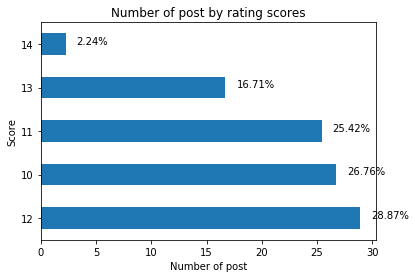

In [1328]:
# plot a bar chart
ax = num_rate.plot(kind='barh')
[ax.text(v+1, i, '{:.2f}%'.format(v)) for i, v in enumerate(num_rate)];

ax.set_title('Number of post by rating scores')
ax.set_xlabel('Number of post')
ax.set_ylabel('Score')




In [1331]:
df[df.rating_numerator==14]['dog_prediction'].value_counts()

no_info                    12
Pembroke                    4
French_bulldog              3
golden_retriever            2
bloodhound                  1
Pomeranian                  1
Eskimo_dog                  1
Bedlington_terrier          1
Chihuahua                   1
Rottweiler                  1
standard_poodle             1
black-and-tan_coonhound     1
Labrador_retriever          1
Irish_setter                1
Gordon_setter               1
Samoyed                     1
Old_English_sheepdog        1
Lakeland_terrier            1
Name: dog_prediction, dtype: int64

Most of the scores for dogs in our data is 12 (29%), then the frequency of 10 and 11 is more or less the same. According to the graph above, we assume that WeRateDogs rarely gave more than 14. I checked the dog breed for rating 14, Pembroke received rating 14 more than other breeds.

## Research Question 2: What are the top 10 most frequent breeds of dogs that appear on WeRateDogs?

In [1234]:
top_10_breed= df.groupby('dog_prediction')['tweet_id'].count().sort_values(ascending=False).head(10)

Text(0, 0.5, 'Frequency')

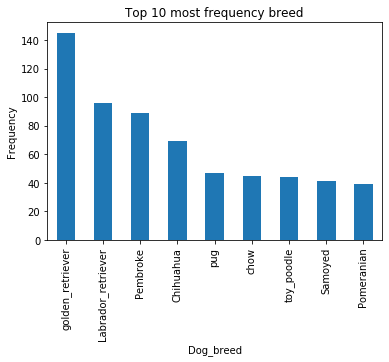

In [1235]:
# Drop no_info rows
top_10_breed=top_10_breed[1:]
#draw a plot
top_10_breed.plot(kind='bar')
plt.title('Top 10 most frequency breed')
plt.xlabel('Dog_breed')
plt.ylabel('Frequency')

In [1236]:
df.query('dog_prediction =="golden_retriever"')[['tweet_id','rating_numerator']]

,tweet_id,rating_numerator
14,889531135344209921,13
16,888917238123831296,12
17,888804989199671297,13
40,883117836046086144,13
44,882268110199369728,13
45,882045870035918850,13
52,880465832366813184,12
69,876484053909872640,13
92,870374049280663552,13
109,865718153858494464,13


golden_retriever, Labrador_retriever, pembroke are the most frequency dog breeds show on WeRateDog 

## Research Question 3: What breeds of dogs get the most likes per tweet

In [1237]:
# pivot_breed = pd.pivot_table(df,index=["dog_prediction"],values=["favorite_counts"]).sort_values(['favorite_counts'],ascending=False).head(10)
# pivot_breed_count = pd.pivot_table(pivot_breed,index=["dog_prediction"],values=["favorite_counts"],aggfunc='count')
# pivot_breed = df.pivot_table(index='dog_prediction', aggfun ='count').sort_values(['favorite_counts'],ascending=False).head(10)
# pivot_breed = pivot_breed.rename(columns={"favorite_counts": "Likes"})
# reference:https://stackoverflow.com/questions/37965380/python-pandas-simple-pivot-table-sum-count
pivot_breed = df.groupby('dog_prediction').agg({'favorite_counts':'mean','tweet_id':'count'}).rename(columns={'tweet_id':'Number of Tweets'})
pivot_breed = pivot_breed.reset_index()

pivot_breed = pivot_breed.sort_values(['favorite_counts'],ascending=False).head(10)

pivot_breed

,dog_prediction,favorite_counts,Number of Tweets
5,Bedlington_terrier,37566.666667,3
71,black-and-tan_coonhound,30945.000000,1
23,French_bulldog,22648.791667,24
53,Saluki,22018.500000,4
0,Afghan_hound,20260.000000,2
109,whippet,20019.857143,7
38,Leonberg,18773.500000,2
84,flat-coated_retriever,17346.714286,7
104,standard_poodle,16808.875000,8
11,Bouvier_des_Flandres,16321.000000,1


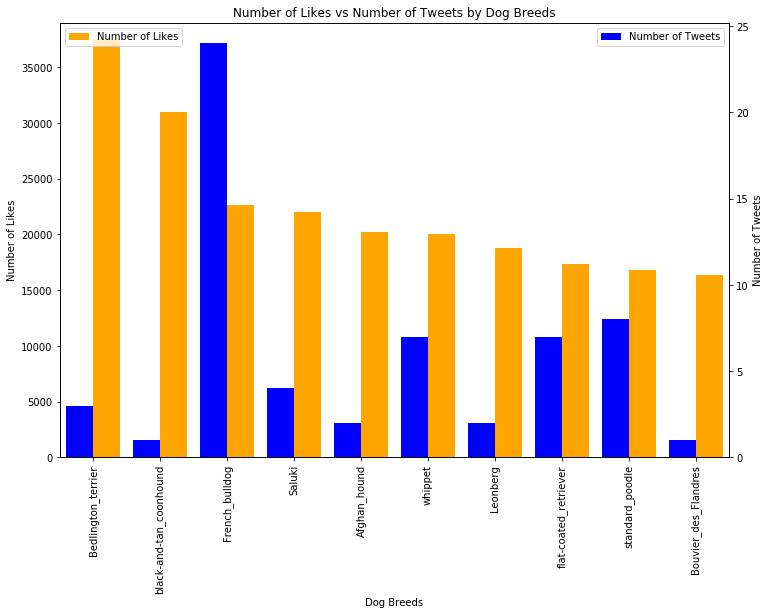

In [1238]:
# reference: https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis
# Create matplotlib figure
fig = plt.figure()
# Create matplotlib axes
ax = fig.add_subplot(111)
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()

width = 0.4

Number_of_Likes = pivot_breed.plot(x='dog_prediction', y='favorite_counts', kind='bar', color = 'orange',
                  width=width, ax=ax, position = 0, figsize=(12,8), label = 'Number of Likes')
Number_of_Tweets_per_bread = pivot_breed.plot(x='dog_prediction', y='Number of Tweets', kind='bar', color = 'blue',
                  width=width, ax=ax2, position = 1, figsize=(12,8), label = 'Number of Tweets')


ax.set_ylabel('Number of Likes')
Number_of_Likes.legend(loc=2)
ax.set(adjustable='box', ylim=(0,39000))
ax2.set_ylabel('Number of Tweets')
ax.set_xlabel('Dog Breeds')
plt.xlim((-0.5,9.5))
plt.title('Number of Likes vs Number of Tweets by Dog Breeds');

In [1347]:
df.query('dog_prediction=="Bedlington_terrier"')

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,url,comment,doggolingo,favorite_counts,retweet_counts,jpg_url,img_num,dog_prediction,conf
128,860524505164394496,2017-05-05 16:00:04+00:00,"<a href=""http://twitter.com/download...",https://twitter.com/dog_rates/status...,13,10,Carl,https://t.co/C2zHcNIu4I,This is Carl. He likes to dance. Doe...,None,22511,4973,https://pbs.twimg.com/media/C_EyeKuX...,1.0,Bedlington_terrier,0.286558
275,828381636999917570,2017-02-05 23:15:47+00:00,"<a href=""http://twitter.com/download...",https://twitter.com/dog_rates/status...,14,10,Doobert,https://t.co/iCk7zstRA9,Meet Doobert. He's a deaf doggo. Did...,doggo,12568,2211,https://pbs.twimg.com/media/C38Asz1W...,1.0,Bedlington_terrier,0.392535
1228,678399652199309312,2015-12-20 02:20:55+00:00,"<a href=""http://twitter.com/download...",https://twitter.com/dog_rates/status...,12,10,None,https://t.co/VRTbo3aAcm,This made my day. 12/10 please enjoy,None,77621,30922,https://pbs.twimg.com/ext_tw_video_t...,1.0,Bedlington_terrier,0.015047


On average, Bedlington_terrier got most likes per tweet. For tweet details, please see above

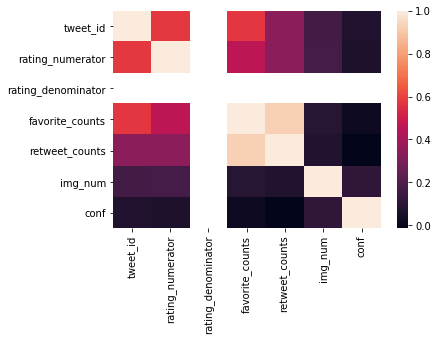

In [1239]:
#correlation metrix for dataset
sns.heatmap(df.corr());

Text(0, 0.5, 'favorite_counts')

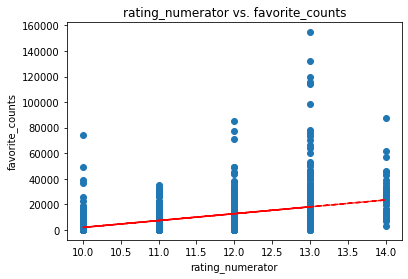

In [44]:
y = df['favorite_counts'].values
x = df['rating_numerator'].values
plt.scatter(x,y);

# draw a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");

plt.title('rating_numerator vs. favorite_counts')
plt.xlabel('rating_numerator')
plt.ylabel('favorite_counts')

From the graph, we can assume that higher rater numerator generally generates higher favorite counts, however, we still need to run the regression model to support this conclusion.

#### Visualizing Data : WordCloud

In [46]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [47]:
# reference:https://www.datacamp.com/community/tutorials/wordcloud-python
text = ','.join(map(str, df.comment))

(-0.5, 399.5, 199.5, -0.5)

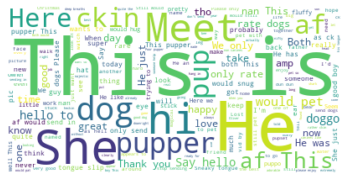

In [48]:
# Why my stopwords doesn't work
stopwords = set(STOPWORDS)
stopwords.update(["This", "is", "He", "She", "Here"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_font_size=110, random_state=200).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [60]:
dog_mask = np.array(Image.open("dog.jpg"))
dog_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [61]:
# Create a word cloud image
wc = WordCloud(background_color="black", max_words=100, mask=dog_mask,
               stopwords=stopwords, contour_width=4)

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("dog.jpg")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

ValueError: Couldn't find space to draw. Either the Canvas size is too small or too much of the image is masked out.

<a id='conclusion'></a>
# Conclusion

- The most common dog species from WeRateDogs over the time period 11/16/2015 and 8/1/2017 is golden retriever.
- On average, the dog breed "Bedlington_terrier" got most likes per tweet.
- We can assume that there is a positive correlation between rating numerator and favorite counts,however, we still need to run the regression model to support this conclusion.
- The most common rating that WeRateDog gave is 12, they rarely gave a score more than 14.

### Improve and Question

#### Data Quality
- Incorrect dog names and default dog name 'a' 

- Lots of record is missing dog stages

I may need to assess and clean these columns for better analysis and visualization.

#### WordCloud
- stopwords don't work for my visualization
- I can't put the words to the image (dog shape)